##Assignment 09

##ID: GO_STP_342

##Task link: https://www.goeduhub.com/11612/logistic-regression-predicting-employee-attrition-learning

##Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

##First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("./dataset/HR_comma_sep.csv")

In [2]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


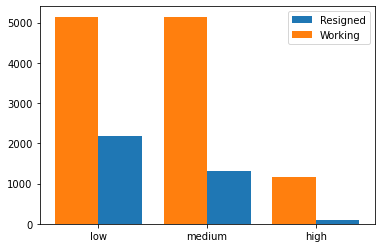

In [4]:
X=df.groupby('left').get_group(1).salary.value_counts().index
x=np.arange(len(X))

plt.bar(x+0.2,df.groupby('left').get_group(1).salary.value_counts().values,width=0.4,label='Resigned')
plt.bar(x-0.2,df.groupby('left').get_group(0).salary.value_counts().values,width=0.4,label='Working')
plt.xticks(x,X)
plt.legend()
plt.show()

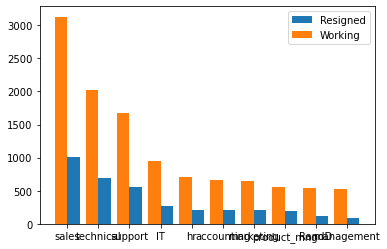

In [5]:
X=df.groupby('left').get_group(1).Department.value_counts().index
x=np.arange(len(X))
plt.bar(x+0.2,df.groupby('left').get_group(1).Department.value_counts().values,width=0.4,label='Resigned')
plt.bar(x-0.2,df.groupby('left').get_group(0).Department.value_counts().values,width=0.4,label='Working')
plt.xticks(x,X)
plt.legend()
plt.show()

In [6]:
dummies=pd.get_dummies(df['salary'],drop_first=True)
dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [7]:
df=pd.concat([df,dummies],axis=1)

In [8]:
df.drop(['salary'],axis=1,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0


In [9]:
le=LabelEncoder()
df['Department']=le.fit_transform(df['Department'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
0,0.38,0.53,2,157,3,0,1,0,7,1,0
1,0.80,0.86,5,262,6,0,1,0,7,0,1
2,0.11,0.88,7,272,4,0,1,0,7,0,1
3,0.72,0.87,5,223,5,0,1,0,7,1,0
4,0.37,0.52,2,159,3,0,1,0,7,1,0


In [10]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.082832,0.040985
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.036324,-0.017906
low,-0.047415,0.005221,-0.002504,-0.001050,-0.040110,-0.006813,0.134722,-0.082832,0.036324,1.000000,-0.847144


In [11]:
df_l=df.groupby(['left']).size()
df_l

left
0    11428
1     3571
dtype: int64

In [12]:
df_l=df.groupby(['left','promotion_last_5years']).size()
df_l

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
dtype: int64

In [13]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
low                        2
medium                     2
dtype: int64

No handles with labels found to put in legend.


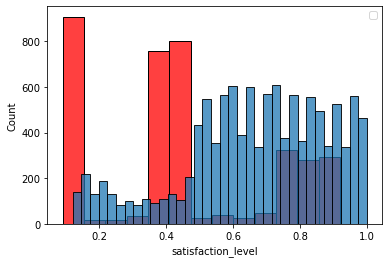

In [14]:

sbn.histplot(x=df[df.left==1].satisfaction_level,kde=False,color='red')
sbn.histplot(x=df[df.left==0].satisfaction_level,kde=False)
plt.legend()

<AxesSubplot:>

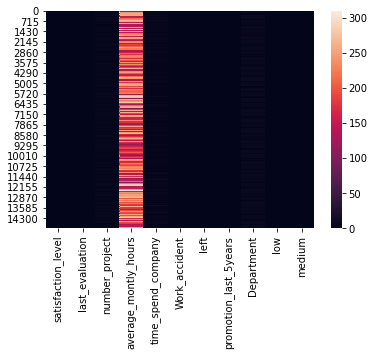

In [15]:
sbn.heatmap(df)

In [16]:
model_df=df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','low','medium']]
model_df.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [17]:
x=model_df
y=df.left

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=5)

In [19]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (11249, 6)
x_test (3750, 6)
y_train (11249,)
y_test (3750,)


In [20]:
from sklearn.linear_model import LogisticRegression
req=LogisticRegression()
req.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_test.shape

(3750,)

In [22]:
y_pred=req.predict(x_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [23]:
y_pred.shape

(3750,)

In [24]:
req.score(x_test,y_test)

0.7658666666666667